# Linear Regression Model for LAG 1 (Scaled)

Data Prepared: Predicting 1 days ahead.
Rows after removing NaNs: 1089

--- Results for 1-Day Forecast ---
MAE:  12.8259
RMSE: 20.2000
R2:   0.3595
NMSE: 0.6367


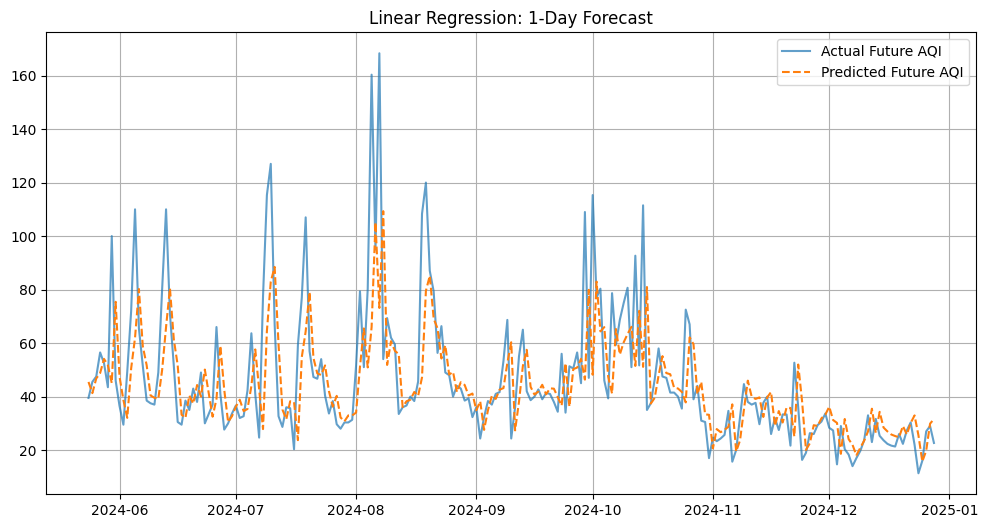

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- Configuration ---
# You only need to change this number to experiment with different lags!
FORECAST_HORIZON = 1
file_name = "LAG1_Ozone_Combined_AQI_2022_2024.csv" # Use your main raw data file here

# --- 1. Load and Optimize Data Preparation ---

# Assuming you have a file with just the raw daily data
# If you don't have a raw file, use your existing one but ignore the pre-made lag columns
try:
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE']).set_index('DATE').sort_index()

    # --- 2. Dynamic Feature & Target Engineering (The Optimization) ---

    # Base Features (Current Day's Data)
    feature_cols = ['Daily_Mean_Ozone', 'Daily_AQI_Value']

    # Create the Target: "What will the AQI be in X days?"
    # shift(-30) pulls the value from 30 days in the future back to the current row
    target_col = f'AQI_Forecast_{FORECAST_HORIZON}d'
    df[target_col] = df['Daily_AQI_Value'].shift(-FORECAST_HORIZON)

    # (Optional) Add Lagged Features: "What was the AQI yesterday?"
    # df['AQI_Yesterday'] = df['Daily_AQI_Value'].shift(1)
    # feature_cols.append('AQI_Yesterday')

    # Drop the rows at the very end where we don't know the future yet (NaNs)
    df_clean = df[feature_cols + [target_col]].dropna()

    print(f"Data Prepared: Predicting {FORECAST_HORIZON} days ahead.")
    print(f"Rows after removing NaNs: {len(df_clean)}")

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # --- 3. Split (Chronological) ---

    split_point = int(len(df_clean) * 0.8)

    X_train = X.iloc[:split_point]
    y_train = y.iloc[:split_point]
    X_test = X.iloc[split_point:]
    y_test = y.iloc[split_point:]

    # --- 4. Scaling (Standard Pipeline) ---

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape y for the scaler
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 5. Model Training ---

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Prediction & Evaluation ---

    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print(f"\n--- Results for {FORECAST_HORIZON}-Day Forecast ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

    # --- 7. Plotting ---

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Future AQI', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted Future AQI', linestyle='--')
    plt.title(f'Linear Regression: {FORECAST_HORIZON}-Day Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

# Linear Regression Model for LAG 7 (Scaled)

Data Prepared: Predicting 7 days ahead.
Rows after removing NaNs: 1083

--- Results for 7-Day Forecast ---
MAE:  17.1804
RMSE: 25.9815
R2:   -0.0551
NMSE: 1.0431


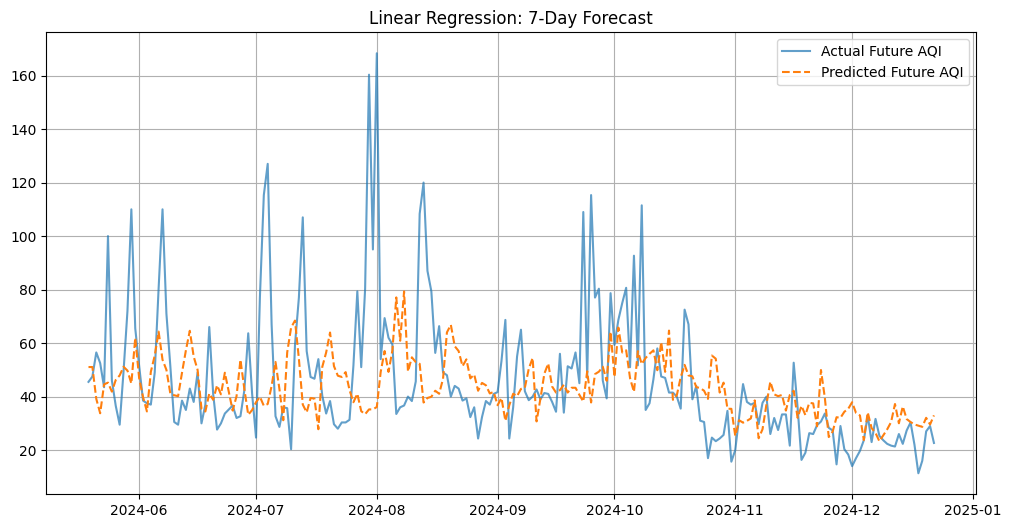

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- Configuration ---
# You only need to change this number to experiment with different lags!
FORECAST_HORIZON = 7
file_name = "LAG1_Ozone_Combined_AQI_2022_2024.csv" # Use your main raw data file here

# --- 1. Load and Optimize Data Preparation ---

# Assuming you have a file with just the raw daily data
# If you don't have a raw file, use your existing one but ignore the pre-made lag columns
try:
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE']).set_index('DATE').sort_index()

    # --- 2. Dynamic Feature & Target Engineering (The Optimization) ---

    # Base Features (Current Day's Data)
    feature_cols = ['Daily_Mean_Ozone', 'Daily_AQI_Value']

    # Create the Target: "What will the AQI be in X days?"
    # shift(-7) pulls the value from 7 days in the future back to the current row
    target_col = f'AQI_Forecast_{FORECAST_HORIZON}d'
    df[target_col] = df['Daily_AQI_Value'].shift(-FORECAST_HORIZON)

    # (Optional) Add Lagged Features: "What was the AQI yesterday?"
    # df['AQI_Yesterday'] = df['Daily_AQI_Value'].shift(1)
    # feature_cols.append('AQI_Yesterday')

    # Drop the rows at the very end where we don't know the future yet (NaNs)
    df_clean = df[feature_cols + [target_col]].dropna()

    print(f"Data Prepared: Predicting {FORECAST_HORIZON} days ahead.")
    print(f"Rows after removing NaNs: {len(df_clean)}")

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # --- 3. Split (Chronological) ---

    split_point = int(len(df_clean) * 0.8)

    X_train = X.iloc[:split_point]
    y_train = y.iloc[:split_point]
    X_test = X.iloc[split_point:]
    y_test = y.iloc[split_point:]

    # --- 4. Scaling (Standard Pipeline) ---

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape y for the scaler
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 5. Model Training ---

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Prediction & Evaluation ---

    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print(f"\n--- Results for {FORECAST_HORIZON}-Day Forecast ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

    # --- 7. Plotting ---

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Future AQI', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted Future AQI', linestyle='--')
    plt.title(f'Linear Regression: {FORECAST_HORIZON}-Day Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

# Linear Regression Model for LAG 14 (Scaled)

Data Prepared: Predicting 14 days ahead.
Rows after removing NaNs: 1076

--- Results for 14-Day Forecast ---
MAE:  16.1747
RMSE: 24.0896
R2:   0.0972
NMSE: 0.8950


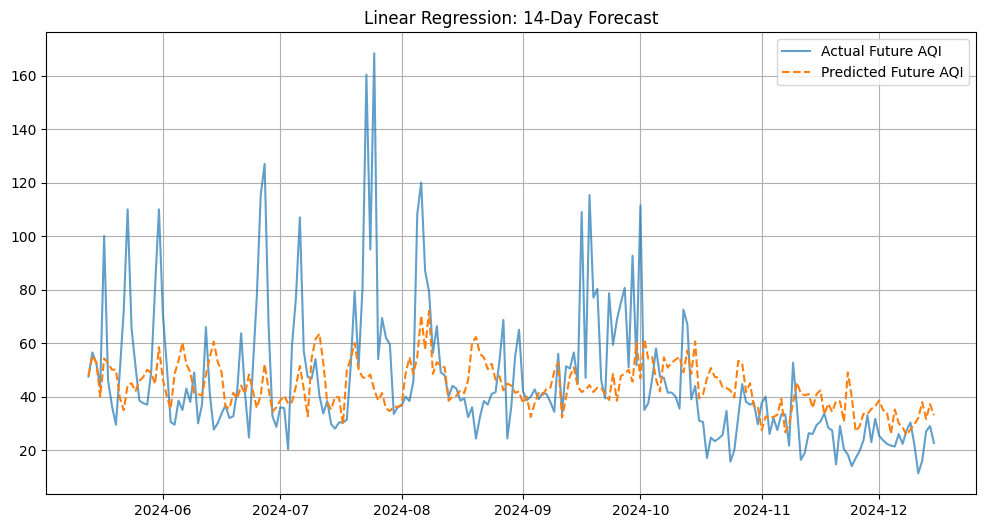

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- Configuration ---
# You only need to change this number to experiment with different lags!
FORECAST_HORIZON = 14
file_name = "LAG1_Ozone_Combined_AQI_2022_2024.csv" # Use your main raw data file here

# --- 1. Load and Optimize Data Preparation ---

# Assuming you have a file with just the raw daily data
# If you don't have a raw file, use your existing one but ignore the pre-made lag columns
try:
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE']).set_index('DATE').sort_index()

    # --- 2. Dynamic Feature & Target Engineering (The Optimization) ---

    # Base Features (Current Day's Data)
    feature_cols = ['Daily_Mean_Ozone', 'Daily_AQI_Value']

    # Create the Target: "What will the AQI be in X days?"
    # shift(-14) pulls the value from 14 days in the future back to the current row
    target_col = f'AQI_Forecast_{FORECAST_HORIZON}d'
    df[target_col] = df['Daily_AQI_Value'].shift(-FORECAST_HORIZON)

    # (Optional) Add Lagged Features: "What was the AQI yesterday?"
    # df['AQI_Yesterday'] = df['Daily_AQI_Value'].shift(1)
    # feature_cols.append('AQI_Yesterday')

    # Drop the rows at the very end where we don't know the future yet (NaNs)
    df_clean = df[feature_cols + [target_col]].dropna()

    print(f"Data Prepared: Predicting {FORECAST_HORIZON} days ahead.")
    print(f"Rows after removing NaNs: {len(df_clean)}")

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # --- 3. Split (Chronological) ---

    split_point = int(len(df_clean) * 0.8)

    X_train = X.iloc[:split_point]
    y_train = y.iloc[:split_point]
    X_test = X.iloc[split_point:]
    y_test = y.iloc[split_point:]

    # --- 4. Scaling (Standard Pipeline) ---

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape y for the scaler
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 5. Model Training ---

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Prediction & Evaluation ---

    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print(f"\n--- Results for {FORECAST_HORIZON}-Day Forecast ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

    # --- 7. Plotting ---

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Future AQI', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted Future AQI', linestyle='--')
    plt.title(f'Linear Regression: {FORECAST_HORIZON}-Day Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

# Linear Regression Model for LAG 30 (Scaled)

Data Prepared: Predicting 30 days ahead.
Rows after removing NaNs: 1060

--- Results for 30-Day Forecast ---
MAE:  17.7715
RMSE: 25.5597
R2:   0.0013
NMSE: 0.9902


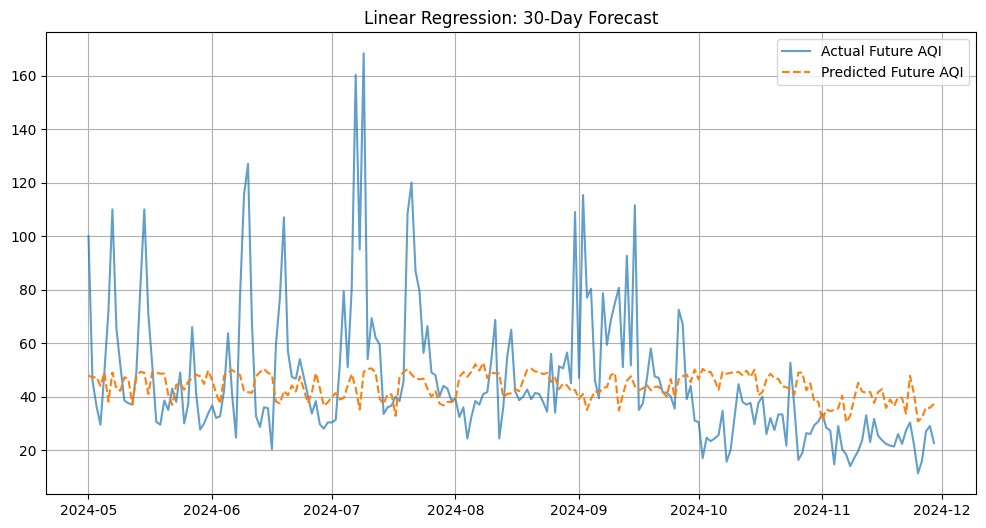

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- Configuration ---
# You only need to change this number to experiment with different lags!
FORECAST_HORIZON = 30
file_name = "LAG1_Ozone_Combined_AQI_2022_2024.csv" # Use your main raw data file here

# --- 1. Load and Optimize Data Preparation ---

# Assuming you have a file with just the raw daily data
# If you don't have a raw file, use your existing one but ignore the pre-made lag columns
try:
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE']).set_index('DATE').sort_index()

    # --- 2. Dynamic Feature & Target Engineering (The Optimization) ---

    # Base Features (Current Day's Data)
    feature_cols = ['Daily_Mean_Ozone', 'Daily_AQI_Value']

    # Create the Target: "What will the AQI be in X days?"
    # shift(-30) pulls the value from 30 days in the future back to the current row
    target_col = f'AQI_Forecast_{FORECAST_HORIZON}d'
    df[target_col] = df['Daily_AQI_Value'].shift(-FORECAST_HORIZON)

    # (Optional) Add Lagged Features: "What was the AQI yesterday?"
    # df['AQI_Yesterday'] = df['Daily_AQI_Value'].shift(1)
    # feature_cols.append('AQI_Yesterday')

    # Drop the rows at the very end where we don't know the future yet (NaNs)
    df_clean = df[feature_cols + [target_col]].dropna()

    print(f"Data Prepared: Predicting {FORECAST_HORIZON} days ahead.")
    print(f"Rows after removing NaNs: {len(df_clean)}")

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # --- 3. Split (Chronological) ---

    split_point = int(len(df_clean) * 0.8)

    X_train = X.iloc[:split_point]
    y_train = y.iloc[:split_point]
    X_test = X.iloc[split_point:]
    y_test = y.iloc[split_point:]

    # --- 4. Scaling (Standard Pipeline) ---

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape y for the scaler
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 5. Model Training ---

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Prediction & Evaluation ---

    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print(f"\n--- Results for {FORECAST_HORIZON}-Day Forecast ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

    # --- 7. Plotting ---

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Future AQI', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted Future AQI', linestyle='--')
    plt.title(f'Linear Regression: {FORECAST_HORIZON}-Day Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")